<a href="https://colab.research.google.com/github/LeonimerMelo/Machine_Learning/blob/K-Means/K_Means_Clustering_Algorithm_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrupamento K-Means (K-Means Clustering)

O século XXI é frequentemente referido como a era do “Big Data” devido ao aumento sem precedentes nos volumes de dados gerados.  
➡️ O termo "Big Data" refere-se ao imenso volume, variedade e velocidade de dados produzidos atualmente, vindos de sensores, redes sociais, transações, etc.

Como a maioria desses dados é gerada sem rótulos (*labels*), interpretá-los se torna uma tarefa complexa. Para extrair informações desses dados não rotulados, algoritmos de *machine learning* não supervisionados (*unsupervised machine learning*) foram desenvolvidos e continuam sendo aprimorados.  
➡️ Dados não rotulados não possuem uma "resposta correta" associada (ex.: qual categoria pertence). Métodos não supervisionados descobrem padrões ocultos por conta própria.

Esses algoritmos determinam relações subjacentes nos dados agrupando os pontos de dados em famílias de *clusters* (agrupamentos). Os *clusters* resultantes não apenas destacam associações dentro dos dados, como também são essenciais para a criação de modelos preditivos para novos dados.  
➡️ O agrupamento permite descobrir padrões ou segmentos no conjunto de dados, útil em diversas aplicações como segmentação de clientes ou compressão de dados.

---

## O Algoritmo K-Means

O *k-means clustering* é o algoritmo de aprendizado de máquina não supervisionado mais utilizado para particionar um conjunto de dados em *k* grupos (ou seja, *k clusters*), onde *k* representa o número de grupos pré-definidos pelo analista.  
➡️ *K* é um parâmetro que o usuário define previamente, e pode ser escolhido por métodos como o *Elbow Method*.

Ele classifica objetos em múltiplos grupos (*clusters*), de modo que objetos dentro do mesmo *cluster* sejam o mais semelhantes possível (alta similaridade intra-cluster), enquanto objetos de *clusters* diferentes sejam o mais diferentes possível (baixa similaridade inter-cluster).  
➡️ A ideia é maximizar a coerência interna de cada grupo e a distinção entre grupos diferentes.

No *k-means clustering*, cada *cluster* é representado por seu centro (ou *centroide*), que corresponde à média dos pontos atribuídos ao *cluster*.

---

## A Ideia Básica

A ideia básica por trás do *k-means clustering* consiste em definir *clusters* de forma que a variação intra-cluster total (também chamada de variação dentro dos *clusters*) seja minimizada.  
➡️ Variação intra-cluster refere-se à soma das distâncias entre cada ponto e o centro de seu *cluster*. Menor variação implica em grupos mais “compactos”.

Existem vários algoritmos de *k-means* disponíveis. O algoritmo padrão é o **algoritmo de Hartigan-Wong** (1979), que define a variação intra-cluster como a soma dos quadrados das distâncias euclidianas entre os itens e o centróide correspondente:

$$
W(C_k)=\sum_{x_i ∈ C_k} (x_i−μ_k)^2
$$

onde:
* $x_i$ é um ponto de dado pertencente ao *cluster* $C_k$  
* $\mu_k$ é o valor médio (centróide) dos pontos atribuídos ao *cluster* $C_k$

Cada observação $(x_i)$ é atribuída a um *cluster* tal que a soma dos quadrados da distância entre a observação e o centro do *cluster* $(\mu_k)$ seja minimizada.

Definimos a variação total dentro dos *clusters* como:

$$
tot.withinness=\sum_{k=1}^k W(C_k)=\sum_{k=1}^k \sum_{x_i ∈ C_k} (x_i−μ_k)^2
$$

A **soma total dos quadrados intra-cluster** mede a *compacidade* (ou qualidade) do agrupamento, e queremos que ela seja a menor possível.  
➡️ Quanto mais compactos os grupos, melhor a segmentação. Esse valor é usado para comparar diferentes valores de *k* e escolher o melhor número de grupos.

---
## Algoritmo de Agrupamento K-Means (*K-Means Clustering Algorithm*)

O **K-Means** é um dos métodos de agrupamento mais comumente utilizados, especialmente porque implementa um algoritmo muito simples.  
➡️ Sua simplicidade o torna ideal para problemas introdutórios e também para aplicações com grandes volumes de dados.

Para usar o K-Means, o usuário precisa definir um valor para **K**, que corresponde ao número de *clusters* (agrupamentos) que se deseja identificar no conjunto de dados.  
➡️ Esse valor é definido previamente, o que exige alguma análise (visual, heurística ou automática) para escolher o valor ideal de *K*.

Considerando um exemplo bidimensional com **K = 2**, o algoritmo segue os seguintes passos:

1. Cria **2 centróides aleatórios** (estrelas na figura B).  
   ➡️ Os centróides são pontos iniciais que representarão o centro de cada *cluster*. São escolhidos aleatoriamente no início.

2. Gera **2 *clusters*** atribuindo cada ponto de dado ao centróide mais próximo (quadrados vermelhos e azuis na figura B).  
   ➡️ Cada ponto é atribuído ao *cluster* cujo centróide está mais próximo, normalmente usando distância euclidiana.

3. Calcula **novos centróides** para cada um dos 2 *clusters* (figura C).  
   ➡️ Os centróides são atualizados para refletir a média dos pontos agora atribuídos a cada *cluster*.

4. **Reatribui os pontos de dados** com base nesse novo conjunto de centróides (figura C).  
   ➡️ Com os novos centróides, os dados podem mudar de *cluster*. O algoritmo repete os passos 3 e 4 até que não haja mais mudanças.

   - Se houver alguma nova atribuição, o algoritmo retorna ao passo 3.  
   - Se **nenhuma nova atribuição ocorrer**, o algoritmo **termina** (figura D).  
     ➡️ O critério de parada mais comum é quando os *clusters* se estabilizam — isto é, os centróides não mudam mais de posição.


🖼️ **Ilustração (Figura B–D)**  
A imagem mostra esse processo com pontos vermelhos e azuis, além das estrelas que representam os centróides. Ela ilustra como o agrupamento vai se ajustando até encontrar uma configuração estável.

<center><img src='https://i0.wp.com/www.blopig.com/blog/wp-content/uploads/2020/07/image-10.png?w=461&ssl=1' width=500></center>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
from collections import Counter

---

### 🧰 **Comentando cada biblioteca usada**

```python
import numpy as np
```
🔹 **NumPy** (Numerical Python)  
É a **base para cálculo numérico e manipulação de arrays** em Python.  
No contexto de K-Means:
- Criação de dados, matrizes, e vetores
- Cálculo de distâncias, médias (centróides), etc.

---

```python
import matplotlib.pyplot as plt
```
🔹 **Matplotlib.pyplot**  
Usada para **criar gráficos e visualizações estáticas**.  
É comum para:
- Plotar **dispersão de pontos (scatter plot)** dos clusters
- Visualizar centróides
- Customizar gráficos (títulos, cores, legendas)

---

```python
from sklearn.datasets import make_blobs
```
🔹 **make_blobs – Scikit-learn**  
Gera **conjuntos de dados sintéticos agrupáveis**, ideal para testes com clustering.  
- Permite criar **n clusters** de pontos em **espaços multidimensionais**
- Usado para **demonstrações e aprendizado**

---

```python
from sklearn.cluster import KMeans
```
🔹 **KMeans – Scikit-learn**  
Classe que implementa o algoritmo **K-Means Clustering**.  
Funções principais:
- `fit()`: treina o modelo nos dados
- `predict()`: atribui cada ponto ao cluster correspondente
- `cluster_centers_`: retorna os centróides
- `inertia_`: mede a soma das distâncias internas (qualidade do clustering)

---

```python
import seaborn as sns
```
🔹 **Seaborn**  
Biblioteca de **visualização baseada no Matplotlib**, com foco em estilo e estatísticas.  
- Permite criar **gráficos mais bonitos com menos código**
- Possui esquemas de **cores integradas** ideais para clusters
- Pode ser usada para **mapear variáveis categóricas a cores**

---

```python
from collections import Counter
```
🔹 **Counter – módulo collections**  
Classe utilitária que **conta a frequência de elementos** em listas ou arrays.  
No clustering:
- Pode ser usada para **contar quantos pontos foram atribuídos a cada cluster**
- Facilita análise de distribuição dos dados entre grupos

---

In [ ]:
# Estilo visual
sns.set(style="whitegrid")

##Exemple #1

In [ ]:
# 1. Gerar dados artificiais com 2 clusters
X, y_true = make_blobs(n_samples=300, centers=2, cluster_std=1.5, random_state=42)

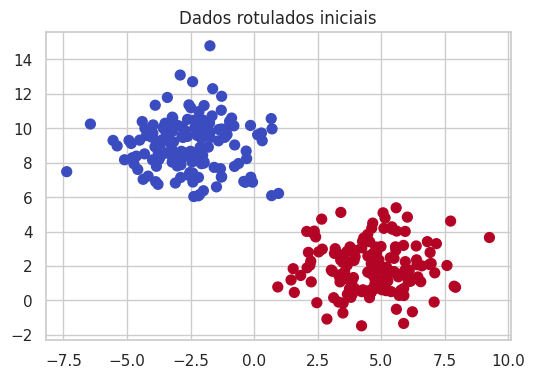

In [ ]:
# Plot inicial dos dados
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='coolwarm', s=50)
plt.title("Dados rotulados iniciais")
plt.show()

In [ ]:
# Conta a quantidade de amostras de cada classe
Counter(y_true)

Counter({np.int64(1): 150, np.int64(0): 150})

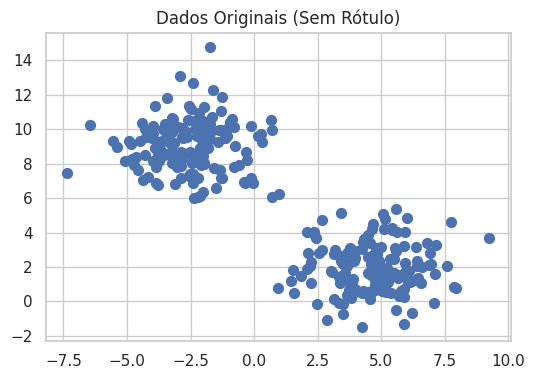

In [ ]:
# Plot dos dados sem rótulos
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Dados Originais (Sem Rótulo)")
plt.show()

In [ ]:
# 2. Inicializar KMeans com 2 clusters e salvar as etapas
kmeans = KMeans(n_clusters=2, init='random', n_init=1, max_iter=1, random_state=42)
kmeans.fit(X)

KMeans(init='random', max_iter=1, n_clusters=2, n_init=1, random_state=42)

In [ ]:
kmeans.cluster_centers_

array([[ 3.01453256,  3.37245182],
       [-2.99452086,  9.77695671]])

In [ ]:
Counter(kmeans.labels_)

Counter({np.int32(0): 152, np.int32(1): 148})

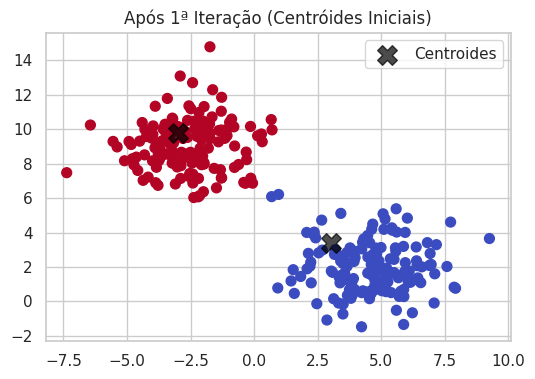

In [ ]:
# Plot após primeira atribuição (1ª iteração)
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='coolwarm', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', s=200, alpha=0.7, marker='X', label='Centroides')
plt.title("Após 1ª Iteração (Centróides Iniciais)")
plt.legend()
plt.show()

In [ ]:
# 3. Executar iterações até a convergência
kmeans_full = KMeans(n_clusters=2, init='random', n_init=1, max_iter=100, random_state=42)
kmeans_full.fit(X)

KMeans(init='random', max_iter=100, n_clusters=2, n_init=1, random_state=42)

In [ ]:
kmeans_full.cluster_centers_

array([[ 4.67569976,  1.89379461],
       [-2.57254954,  9.03538557]])

In [ ]:
Counter(kmeans_full.labels_)

Counter({np.int32(0): 150, np.int32(1): 150})

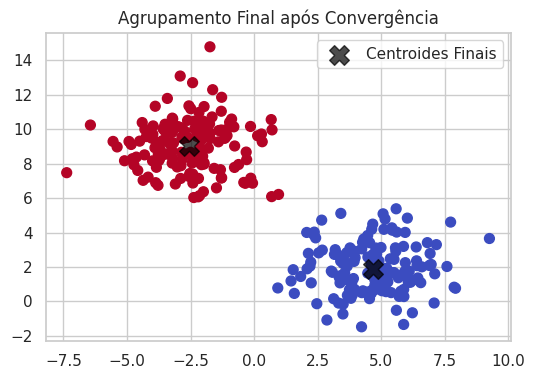

In [ ]:
# Plot final com agrupamento definitivo
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_full.labels_, cmap='coolwarm', s=50)
plt.scatter(kmeans_full.cluster_centers_[:, 0], kmeans_full.cluster_centers_[:, 1],
            c='black', s=200, alpha=0.7, marker='X', label='Centroides Finais')
plt.title("Agrupamento Final após Convergência")
plt.legend()
plt.show()

##Exemple #2
It is a simple example to understand how k-means works. In this example, we are going to first generate 2D dataset containing 4 different blobs and after that will apply k-means algorithm to see the result.

First, we will start by importing the necessary packages

The following code will generate the 2D, containing four blobs

In [ ]:
X, y_true, centers_true = make_blobs(n_samples=400, centers=4, cluster_std=0.65,
                                     random_state=0, return_centers=True)

In [ ]:
# Conta a quantidade de amostras de cada classe
Counter(y_true)

Counter({np.int64(3): 100,
         np.int64(2): 100,
         np.int64(0): 100,
         np.int64(1): 100})

Next, the following code will help us to visualize the dataset

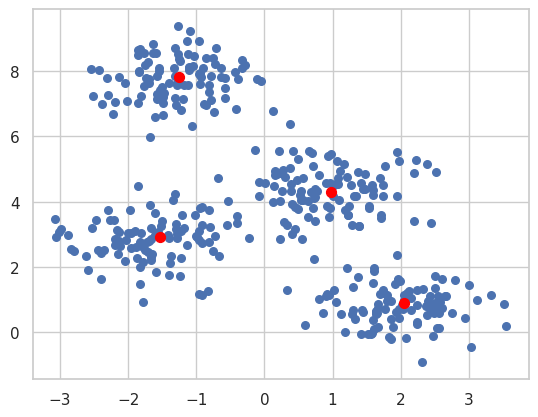

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.scatter(centers_true[:, 0], centers_true[:, 1], c='red', s=50)
plt.show()

Another way to plot using Seaborn, with classes discrimination

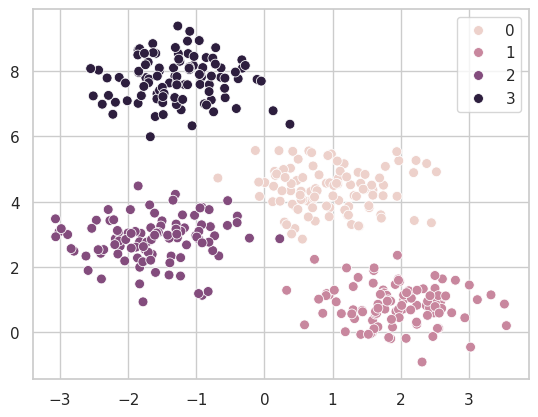

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_true, s=50)
plt.show()

###K-Means clustering (sklearn)
- **n_clusters**: int, default=8. The number of clusters to form as well as the number of
centroids to generate.
- **n_init**: 'auto' or int, default=10. Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs
in terms of inertia. Several runs are recommended for sparse high-dimensional problems.
- **max_iter**: int, default=300. Maximum number of iterations of the k-means algorithm for a
single run.

Next, make an object of KMeans along with providing number of clusters, train the model and do the prediction as follows


In [ ]:
# K-Means clustering.
kmeans = KMeans(n_init=10, n_clusters=4, verbose=0, max_iter=2)
# Compute k-means clustering.
kmeans.fit(X)
# Predict the closest cluster each sample in X belongs to.
y_kmeans = kmeans.predict(X)

Now, with the help of following code we can plot and visualize the cluster’s centers picked by k-means Python estimator

In [ ]:
Counter(y_kmeans)

Counter({np.int32(1): 103, np.int32(3): 98, np.int32(0): 99, np.int32(2): 100})

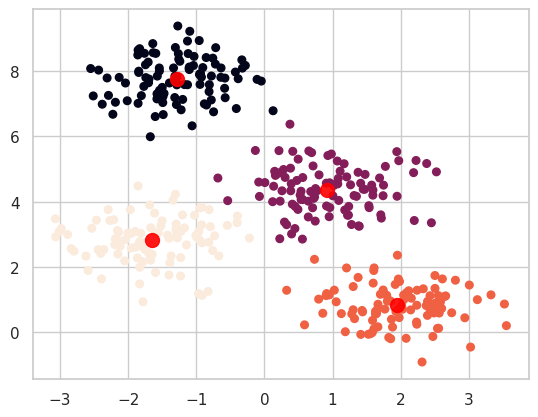

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30)
centers_predict = kmeans.cluster_centers_
plt.scatter(centers_predict[:, 0], centers_predict[:, 1], c='red', s=100, alpha=0.9)
plt.show()

Another way to plot using Seaborn

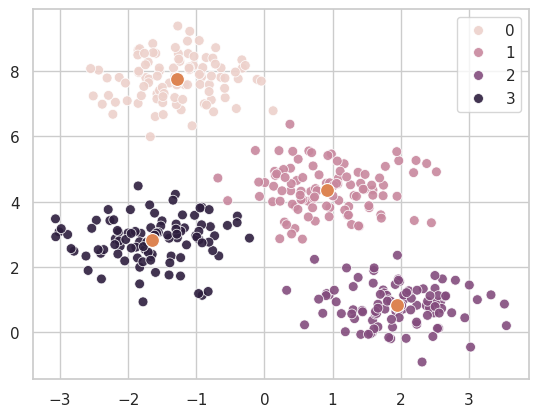

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, s=50, alpha=.9)
sns.scatterplot(x=centers_predict[:, 0], y=centers_predict[:, 1], s=100)
plt.show()

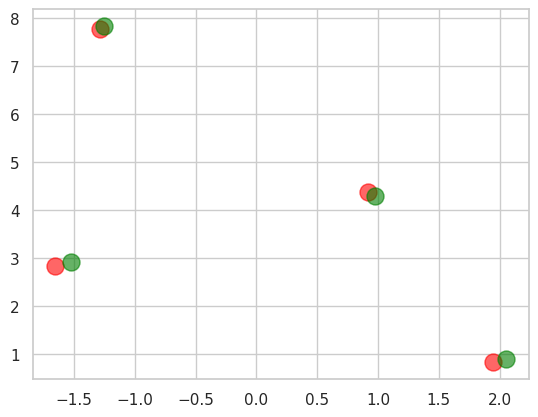

In [ ]:
plt.scatter(centers_predict[:, 0], centers_predict[:, 1], c='red', s=150, alpha=0.6)
plt.scatter(centers_true[:, 0], centers_true[:, 1], c='green', s=150, alpha=0.6)
plt.show()

## Exercícios

1. Gerar 10 novos bancos de dados utilizando comando make_blobs fazendo 10 aranjos diferentes, alterando os parâmetros: `n_samples` = 100, 800 e 1500, `centers` = 3, 5 e 8, `cluster_std` = 0.40, 0.70 e 0.90, e `random_state` = 10, 20 e 30. Para cada arranjo  dos parâmetros modificados verificar e anotar a eficiência do método para predição dos centróides. Comentar os resultados.

## Referências

[1] https://realpython.com/k-means-clustering-python/

[2] https://www.w3schools.com/python/python_ml_k-means.asp

[3] https://medium.com/programadores-ajudando-programadores/k-means-o-que-%C3%A9-como-funciona-aplica%C3%A7%C3%B5es-e-exemplo-em-python-6021df6e2572

[4] https://towardsdatascience.com/how-to-perform-kmeans-clustering-using-python-7cc296cec092

[5] https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

[6] https://uc-r.github.io/kmeans_clustering

[7] https://www.datacamp.com/tutorial/k-means-clustering-python

[8] https://realpython.com/k-means-clustering-python/

[9] https://www.blopig.com/blog/2020/07/k-means-clustering-made-simple/

##Contribuições dos Alunos

-----------------------------
Simulation 1:
 n_samples = 100
 centers = 5
 cluster_std = 0.4
 random_state = 30



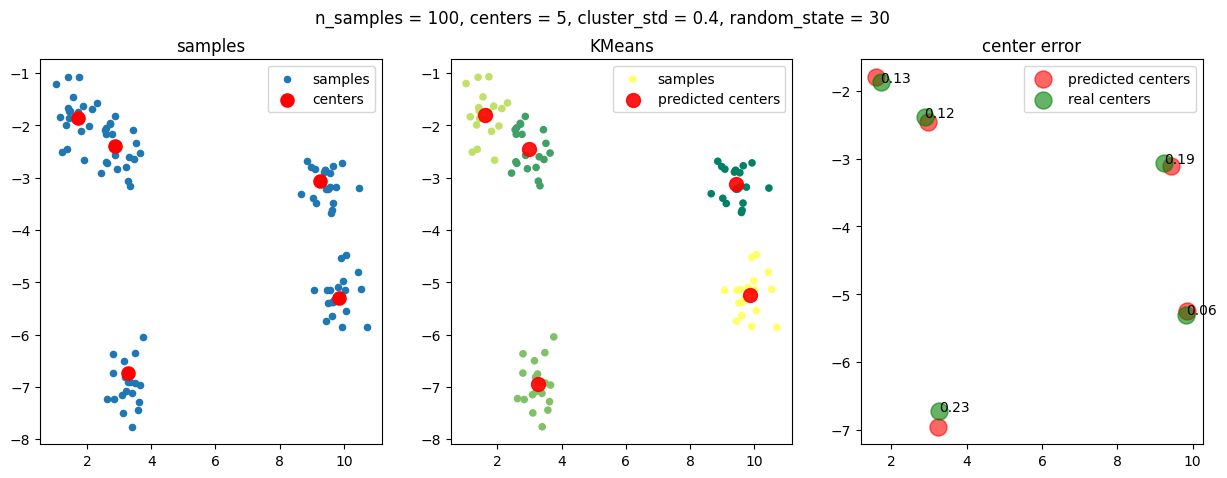

-----------------------------
Simulation 2:
 n_samples = 800
 centers = 8
 cluster_std = 0.7
 random_state = 10



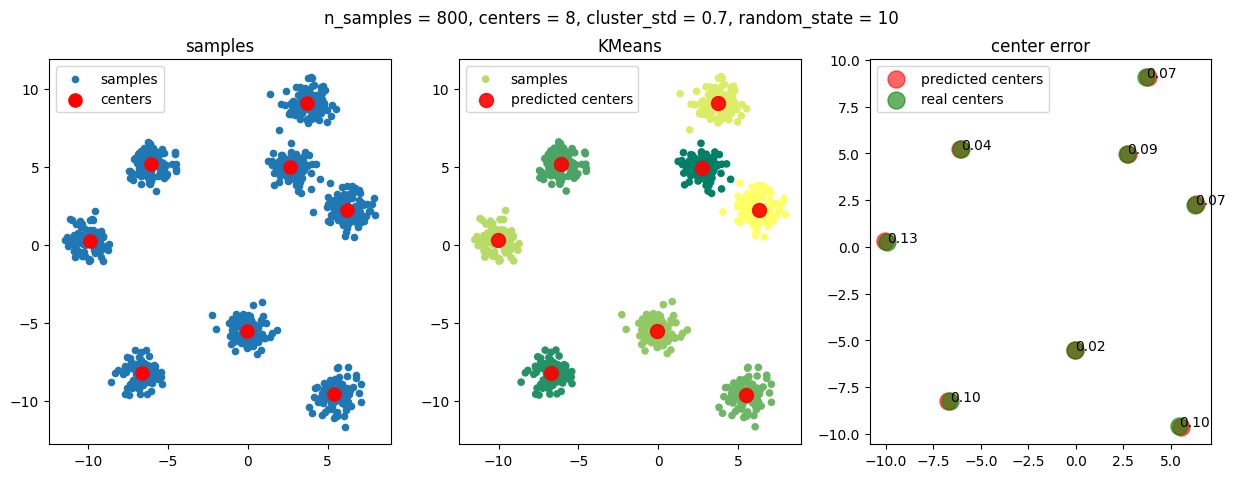

-----------------------------
Simulation 3:
 n_samples = 100
 centers = 3
 cluster_std = 0.7
 random_state = 30



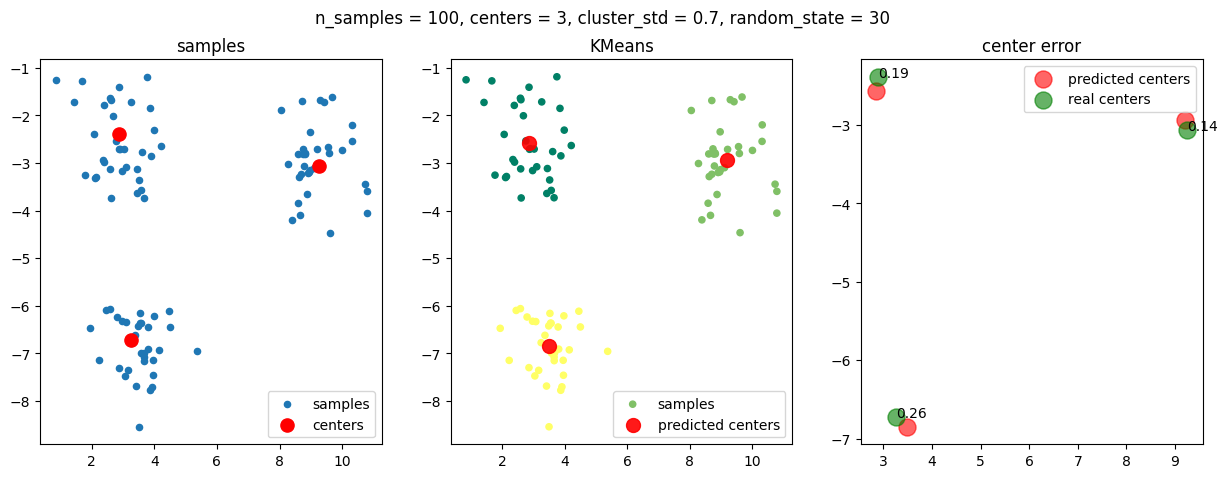

In [ ]:
# Contribuição de Cristian Alberto Gimenez de Castro <cristian.alberto@uel.br> 08/2024

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = [100, 800, 1500]
centers = [3, 5, 8]
cluster_std = [0.40, 0.70, 0.90]
random_state = [10, 20, 30]

for index in range(3):
  print(f"-----------------------------\nSimulation {index + 1}:")

  # Simulating random data base
  randSim = [np.random.randint(len(n_samples)),
            np.random.randint(len(centers)),
            np.random.randint(len(cluster_std)),
            np.random.randint(len(random_state))]

  print(f" n_samples = {n_samples[randSim[0]]}\n",
        f"centers = {centers[randSim[1]]}\n",
        f"cluster_std = {cluster_std[randSim[2]]}\n",
        f"random_state = {random_state[randSim[3]]}\n")

  # Generating sample data
  X, y_true, centers_true = make_blobs(n_samples=n_samples[randSim[0]],
                                      centers=centers[randSim[1]],
                                      cluster_std=cluster_std[randSim[2]],
                                      random_state=random_state[randSim[3]],
                                      return_centers=True)

  # KMeans
  kmeans = KMeans(n_init=10, n_clusters=centers[randSim[1]])
  kmeans.fit(X)
  y_kmeans = kmeans.predict(X)

  # Figure
  fig, ax = plt.subplots(1, 3, figsize=(15, 5))

  # Generated samples
  ax[0].scatter(X[:, 0], X[:, 1], s=20, label='samples')
  ax[0].scatter(centers_true[:, 0], centers_true[:, 1], c='red', s=90, label='centers')
  ax[0].set_title('samples')
  ax[0].legend()

  # Kmeans
  ax[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='summer', label='samples')
  centers_predict = kmeans.cluster_centers_
  ax[1].scatter(centers_predict[:, 0], centers_predict[:, 1], c='red', s=100, alpha=0.9, label='predicted centers')
  ax[1].set_title('KMeans')
  ax[1].legend()

  # Ordering predicted centers
  centers_predict_ordered = []
  for i in range(len(centers_true)):
    minDist = 10
    for j in range(len(centers_predict)):
      dist = np.linalg.norm(centers_predict[j] - centers_true[i])
      if abs(dist) < abs(minDist):
        minDist = dist
        ind = j
    centers_predict_ordered.append([centers_predict[ind, 0], centers_predict[ind, 1]])

  # Predicted centers x real centers
  ax[2].scatter(centers_predict[:, 0], centers_predict[:, 1], c='red', s=150, alpha=0.6, label='predicted centers')
  ax[2].scatter(centers_true[:, 0], centers_true[:, 1], c='green', s=150, alpha=0.6, label='real centers')
  ax[2].set_title('center error')
  ax[2].legend()

  for cent in range(len(centers_true)):
    ax[2].text(centers_true[cent,0], centers_true[cent,1], '%.2f' % abs(np.linalg.norm(centers_predict_ordered[cent] - centers_true[cent])))

  fig.suptitle(f"n_samples = {n_samples[randSim[0]]}, centers = {centers[randSim[1]]}, cluster_std = {cluster_std[randSim[2]]}, random_state = {random_state[randSim[3]]}")
  plt.show()